## Part 1

We need ot follow the beam of tachyon. It always travels down, passes through "." no problem and splits to adjacent right and left space when encountering splinter: "^". We need to count how many times beam reaches a splinter.

In [1]:
import re
from pathlib import Path

import helper as h
import matplotlib.pyplot as plt
import networkx as nx

logger = h.setup_logger("AoC_2025: Day 7", level="INFO")

In [2]:
dummy_input = """
..S..
.....
..^..
^....
.^.^.
.....
"""

In [3]:
def read_input(src: str | Path):
    if Path(src).is_file():
        with open(src, "r") as f:
            data = f.read().strip().splitlines()
    else:
        data = src.strip().splitlines()

    splits = set()
    G = nx.Graph()
    max_l = len(data[0])
    max_rows = len(data)
    for i, line in enumerate(data):
        if i == 0:
            start_position = (i, data[0].find("S"))
            G.add_node(start_position)
            current_positions = [start_position]
        else:
            new_positions = {(i, d) for _, d in current_positions}
            defracted_positions = set()

            for defractor in re.finditer("\\^", line):
                d = defractor.start()
                if (i, d) in new_positions:
                    splits.add((i, d))
                    new_positions.remove((i,d))
                    valid_positions = {(i, d_) for d_ in [d - 1, d + 1] if d_ >= 0 and d_ < max_l and line[d_] != "^"}
                    defracted_positions |= valid_positions
                    G.add_edges_from([((i-1, d), cp) for cp in valid_positions])

            G.add_edges_from([((i-1, d), (i, d)) for i, d in new_positions])

            
            current_positions = new_positions.union(defracted_positions)

    return G, start_position, len(splits), max_rows

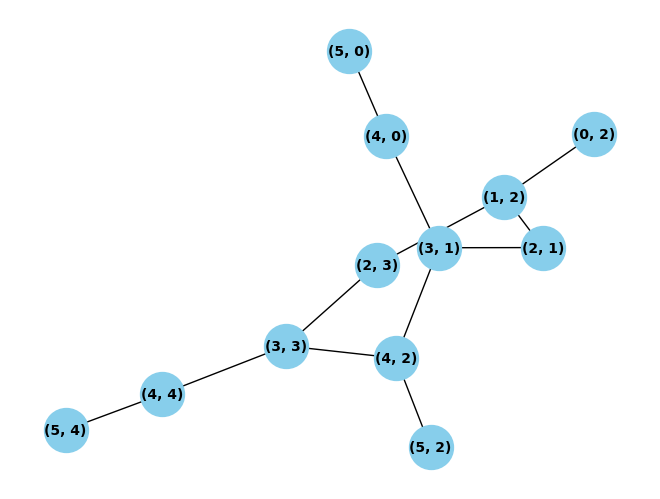

In [4]:
G, _, _, _ = read_input(dummy_input)
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1000, font_size=10, font_weight="bold")
plt.show()


In [5]:
def part1(src: str | Path):
    _, _, splits, _ = read_input(src)
    return splits

h.extended_assert("dummy_input", part1(dummy_input), 3)

In [6]:
h.extended_assert("toy", part1("inputs/day_07_toy.txt"), 21)

In [7]:
part1("inputs/day_07.txt")

1667

## Part 2

Now we need to calculate the number of unique trajectiories through the graph that reach the end nodes.

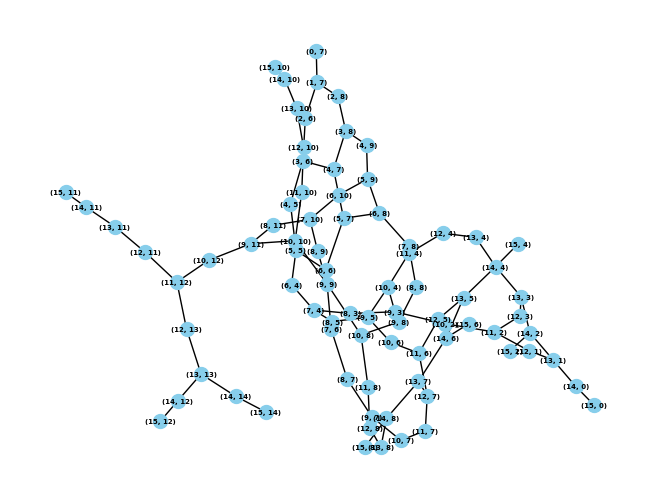

In [8]:
G, start_node, _, _ = read_input("inputs/day_07_toy.txt")
nx.draw(G, with_labels=True, node_color="skyblue", node_size=100, font_size=5, font_weight="bold")
plt.show()

In [9]:
def dfs(G, node, cache, end):
    if node in cache:
        return cache[node]
    
    if node[0] == end:
        result = 1
    
    else:
        cr, cc = node
        possible_nodes = possible_nodes = {
            (r, c) for r, c in set(G[node]) if r == cr + 1 and c in range(cc - 1, cc + 2)
        }
        result = sum([dfs(G, new_node, cache, end) for new_node in possible_nodes])
    cache[node] = result
    return result
    

In [10]:
def part2(src: str | Path):
    G, start_node, _, max_rows = read_input(src)
    return dfs(G, start_node, {}, end=max_rows-1)

h.extended_assert("toy", part2("inputs/day_07_toy.txt"), 40)


In [11]:
part2("inputs/day_07.txt")

62943905501815